In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
class LinearRegression():
  def __init__(self, lr=0.001, iterations=1000, r2_plot = True):
    self.lr = lr
    self.iterations = iterations
    self.r2_plot = r2_plot

  def fit(self, X, y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y
    self.r2_history = []

    #gradient descent
    for i in range(self.iterations):
      hypothesis = np.dot(self.X, self.w) + self.b
      self.r2_history.append(r2_score(self.y, hypothesis)) if r2_score(self.y, hypothesis) > 0 else None
      cost = (1/self.m) * np.sum((hypothesis - self.y)**2)
      dw = 2*((1/self.m) * np.dot(self.X.T, (hypothesis - self.y)))
      db = 2*((1/self.m) * np.sum(hypothesis - self.y))
      self.w = self.w - self.lr * dw
      self.b = self.b - self.lr * db

    if self.r2_plot:
      plt.plot([j for j in range(self.iterations - len(self.r2_history), self.iterations)], self.r2_history)
      plt.xlabel('Iterations')
      plt.ylabel('R2 Score')
      plt.title('R2 Score vs Iterations (After R2 Score > 0)')
      plt.show()

    return self

  def predict(self, X):
    return np.dot(X, self.w) + self.b

In [ ]:
class LassoRegression():

  def __init__(self, penalty=0.1, lr=0.01, iterations=1000, r2_plot=True):
    self.lr = lr
    self.iterations = iterations
    self.penalty = penalty
    self.r2_plot = r2_plot

  def fit(self, X, y):
    self.m, self.n = X.shape
    self.W = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y
    self.r2_history = []

    # change values in each iteration
    for i in range(self.iterations):
      self.update_weights()
      self.r2_history.append(r2_score(self.y, self.predict(self.X))) if r2_score(self.y, self.predict(self.X)) > 0 else None

    if self.r2_plot:
      plt.plot([j for j in range(self.iterations - len(self.r2_history), self.iterations)], self.r2_history)
      plt.xlabel('Iterations')
      plt.ylabel('R2 Score')
      plt.title('R2 Score vs Iterations (After R2 Score > 0)')
      plt.show()

    return self

  def predict(self, X):
    return np.dot(X, self.W) + self.b

  def update_weights(self):
    hypothesis = self.predict(self.X)

    # calculate dw and db
    dW = np.zeros(self.n)
    for j in range(self.n):
        if self.W[j] > 0:
            dW[j] = (-2 * (self.X[:, j]).dot(self.y - hypothesis) + self.penalty) / self.m
        else:
            dW[j] = (-2 * (self.X[:, j]).dot(self.y - hypothesis) - self.penalty) / self.m

    db = -2 * np.sum(self.y - hypothesis) / self.m

    # update weights
    self.W = self.W - self.lr * dW
    self.b = self.b - self.lr * db
    return self


In [ ]:
class RidgeRegression():

  def __init__(self, penalty=0.1, lr=0.01, iterations=1000, r2_plot=True):
    self.lr = lr
    self.iterations = iterations
    self.penalty = penalty
    self.r2_plot = r2_plot

  def fit(self, X, y):
    self.m, self.n = X.shape
    self.W = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y
    self.r2_history = []

    # change values in each iteration
    for i in range(self.iterations):
      self.update_weights()
      self.r2_history.append(r2_score(self.y, self.predict(self.X))) if r2_score(self.y, self.predict(self.X)) > 0 else None

    if self.r2_plot:
      plt.plot([j for j in range(self.iterations - len(self.r2_history), self.iterations)], self.r2_history)
      plt.xlabel('Iterations')
      plt.ylabel('R2 Score')
      plt.title('R2 Score vs Iterations (After R2 Score > 0)')
      plt.show()

    return self

  def predict(self, X):
    return np.dot(X, self.W) + self.b

  def update_weights(self):
    hypothesis = self.predict(self.X)

    # calculate dW, db
    dW = ( - ( 2 * ( self.X.T ).dot( self.y - hypothesis ) ) + ( 2 * self.penalty * self.W ) ) / self.m
    db = - 2 * np.sum( self.y - hypothesis ) / self.m

    # change weights
    self.W = self.W - self.lr * dW
    self.b = self.b - self.lr * db
    return self

In [ ]:
def mean_absolute_error(y, hypothesis):
      return np.mean(np.abs(y - hypothesis))

def mean_squared_error(y, hypothesis):
      return np.mean((y- hypothesis) ** 2)

def r2_score(y, hypothesis):
      ss_total = np.sum((y - np.mean(y)) ** 2)
      ss_residual = np.sum((y - hypothesis) ** 2)
      return 1 - (ss_residual / ss_total) if ss_total != 0 else 1

In [ ]:
import kagglehub
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")
data1 = pd.read_csv(f'{path}/Admission_Predict.csv')
data2 = pd.read_csv(f'{path}/Admission_Predict_Ver1.1.csv')
data = pd.concat([data1, data2], ignore_index=True)
print(data.shape)
data.head()

(900, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data = data.drop('Serial No.', axis=1)
test = data.sample(frac=0.2)
train = data.drop(test.index).values
test = test.values
print(train.shape, test.shape)

(720, 8) (180, 8)


In [ ]:
X = train[:, :-1]
y = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

In [ ]:
X = (X-np.mean(X, axis=0))/np.std(X, axis=0)
X_test = (X_test-np.mean(X_test, axis=0))/np.std(X_test, axis=0)
X.shape

(720, 7)

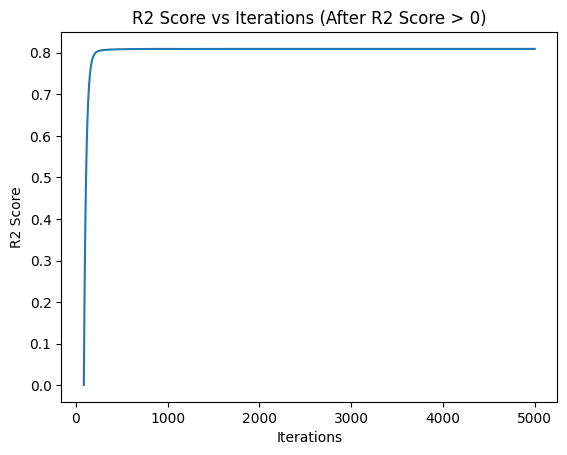

In [ ]:
lr_model = LinearRegression(lr=0.01, iterations=5000)
lr_model.fit(X, y)

In [ ]:
hypothesis = lr_model.predict(X_test)
print('Linear Regression: ')
print()
print(f'MAE: {mean_absolute_error(y_test, hypothesis)}')
print(f'MSE: {mean_squared_error(y_test, hypothesis)}')
print(f'R2 Score: {r2_score(y_test, hypothesis)}')

Linear Regression: 

MAE: 0.04108228177589991
MSE: 0.003161404960653427
R2 Score: 0.8326009763787464


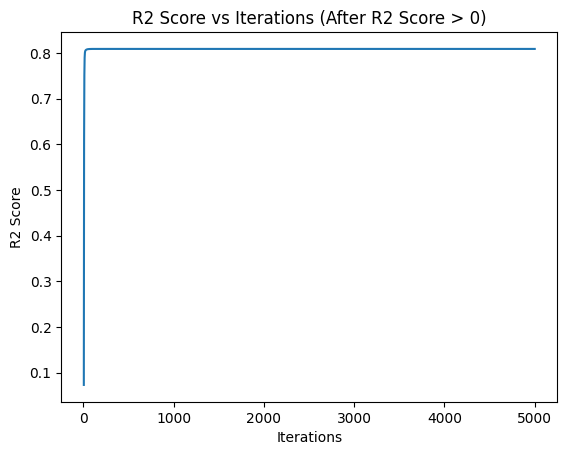

In [ ]:
rr_model = RidgeRegression(penalty=0.001, lr=0.1, iterations=5000)
rr_model.fit(X, y)

In [ ]:
hypothesis = rr_model.predict(X_test)
print('Ridge Regression: ')
print()
print(f'MAE: {mean_absolute_error(y_test, hypothesis)}')
print(f'MSE: {mean_squared_error(y_test, hypothesis)}')
print(f'R2 Score: {r2_score(y_test, hypothesis)}')

Ridge Regression: 

MAE: 0.04108226554828668
MSE: 0.00316140532952226
R2 Score: 0.8326009568468348


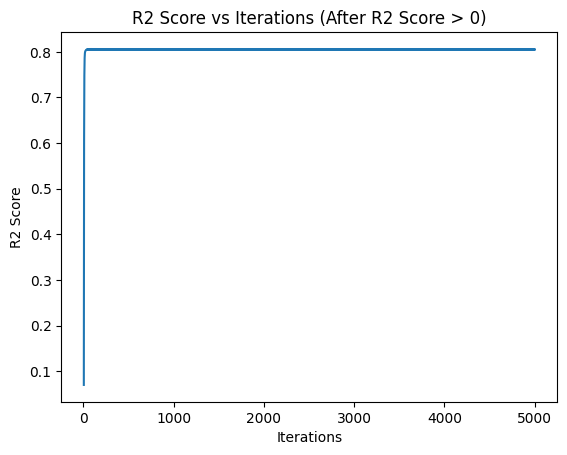

In [ ]:
lar_model = LassoRegression(penalty=10, lr=0.1, iterations=5000)
lar_model.fit(X, y)

In [ ]:
hypothesis = lar_model.predict(X_test)
print('Lasso Regression: ')
print()
print(f'MAE: {mean_absolute_error(y_test, hypothesis)}')
print(f'MSE: {mean_squared_error(y_test, hypothesis)}')
print(f'R2 Score: {r2_score(y_test, hypothesis)}')

Lasso Regression: 

MAE: 0.040349030264558224
MSE: 0.003185885296652148
R2 Score: 0.8313047222148195


In [ ]:
# Stochastic Gradient Descent
def SGD(X, y, lr = 0.01, epochs = 200):
  b = 0
  w = np.zeros(X.shape[1])
  for i in range(epochs):
    row = random.randint(0, X.shape[0]-1)
    X_new = np.array(X.iloc[row,:])
    y_new = np.array(y.iloc[row,:])
    hypothesis = np.dot(X_new, w) + b
    m = X_new.shape[0]
    cost = (1/m) * np.sum((hypothesis - y_new)**2)
    dw = 2*((1/m) * np.dot(X_new.T.reshape(-1,1), (hypothesis - y_new)))
    db = 2*((1/m) * np.sum(hypothesis - y_new))
    w = w - lr * dw
    b = b - lr * db
    return b, w

# Mini Batch Gradient Descent
def MiniBatch(X,y, lr= 0.01, epochs = 200, batch_size = 50):
  b = 0
  w = np.zeros(X.shape[1])
  for i in range(epochs):
    count = 0
    row = []
    while count < batch_size:
      r = random.randint(0, X.shape[0]-1)
      if r not in row:
        row.append(r)
        count += 1
    X_new = X.iloc[row,:]
    y_new = y.iloc[row,:]
    hypothesis = np.dot(X_new, w) + b
    m = X_new.shape[0]
    cost = (1/m) * np.sum((hypothesis - y_new.values))**2
    dw = np.zeros(w.shape)
    for j in range(X_new.shape[1]):
        dw[j] = (2/m) * np.sum(X_new.iloc[:, j].values * (hypothesis - y_new.values))
    db = 2*((1/m) * np.sum(hypothesis - y_new.values))
    w = w - lr * dw
    b = b - lr * db
    return b, w